# 9.4.1 LSTM for Time Series

### Explanation of LSTM (Long Short-Term Memory) Networks for Time Series

Long Short-Term Memory (LSTM) networks are a type of Recurrent Neural Network (RNN) specifically designed to overcome the limitations of traditional RNNs in handling long-term dependencies in sequential data. LSTMs are particularly effective for time series forecasting due to their ability to remember information over extended periods and manage the vanishing gradient problem.

**Key Components of LSTM:**
1. **Cell State**: Carries long-term information across sequences, allowing the network to remember information over long periods.
2. **Hidden State**: Represents the output of the LSTM cell at each time step, capturing short-term dependencies.
3. **Gates**: 
   - **Forget Gate**: Decides which information to discard from the cell state.
   - **Input Gate**: Controls which new information to add to the cell state.
   - **Output Gate**: Determines the output based on the cell state and hidden state.

The combination of these components enables LSTMs to handle complex sequential data and learn patterns over both short and long sequences.

### Benefits and Applications of LSTM in Time Series Forecasting

**Benefits:**
- **Long-Term Dependencies**: LSTMs can capture long-term dependencies in time series data, making them suitable for tasks requiring memory of past information.
- **Handling Non-Stationarity**: LSTMs can handle non-stationary data, which is common in real-world time series.
- **Flexibility**: LSTMs can model various types of time series patterns, including trends, seasonality, and irregularities.

**Applications:**
- **Financial Forecasting**: Predicting stock prices, trading volumes, and economic indicators.
- **Demand Forecasting**: Forecasting product demand, sales, and inventory requirements.
- **Weather Prediction**: Predicting temperature, rainfall, and other meteorological factors.
- **Healthcare**: Forecasting patient admissions, disease outbreaks, and other health metrics.

### Methods for Implementing LSTM for Time Series

1. **Data Preparation**:
   - **Normalization**: Scale the data to ensure consistent input ranges for the model.
   - **Sequencing**: Convert the time series data into sequences with a specified look-back period.
   - **Train-Test Split**: Split the data into training and testing sets.

2. **Model Construction**:
   - **Define Model Architecture**: Create an LSTM model using layers such as LSTM, Dense, and Dropout.
   - **Compile Model**: Specify the optimizer, loss function, and evaluation metrics.

3. **Model Training**:
   - **Fit Model**: Train the LSTM model using the training data, specifying the number of epochs and batch size.

4. **Model Evaluation**:
   - **Evaluate Performance**: Assess the model’s performance using metrics such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

5. **Forecasting**:
   - **Generate Predictions**: Use the trained model to make forecasts on new data.

LSTM networks provide a powerful tool for time series forecasting, leveraging their ability to capture complex patterns and long-term dependencies in sequential data.

___
___
### Readings:
- [Time Series Forecasting Using LSTM](https://medium.com/analytics-vidhya/3-time-series-forecasting-using-lstm-e14b93f4ec7c)
- [Time Series With LSTM](https://readmedium.com/en/https:/medium.com/@matthew1992/time-series-with-lstm-090cb8d16a59)
- [Exploring the LSTM Neural Network Model for Time Series](https://towardsdatascience.com/exploring-the-lstm-neural-network-model-for-time-series-8b7685aa8cf)
- [Time Series Stock Prediction with LSTM](https://gabenosek.medium.com/time-series-stock-prediction-with-lstm-eb04f2224c22)
___
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load the Air Passengers dataset
from statsmodels.datasets import get_rdataset
data = get_rdataset('AirPassengers', 'datasets')
df = data.data

In [3]:
# Prepare the data
df = df.rename(columns={'value': 'y'})
df['ds'] = pd.date_range(start='1949-01-01', periods=len(df), freq='M')
df.set_index('ds', inplace=True)

In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['y'] = scaler.fit_transform(df[['y']])

In [5]:
# Convert the data to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 12
X, y = create_sequences(df['y'].values, SEQ_LENGTH)

In [6]:
# Split into training and test sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [7]:
# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [8]:
# Build the LSTM model
model = Sequential()
model.add(Input(shape=(SEQ_LENGTH, 1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [9]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=30)
history = model.fit(X_train, y_train, epochs=10000, batch_size=16, validation_split=0.1, callbacks=[early_stopping], verbose=0)

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))  # Reshape to 2D for inverse_transform
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape to 2D for inverse_transform

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


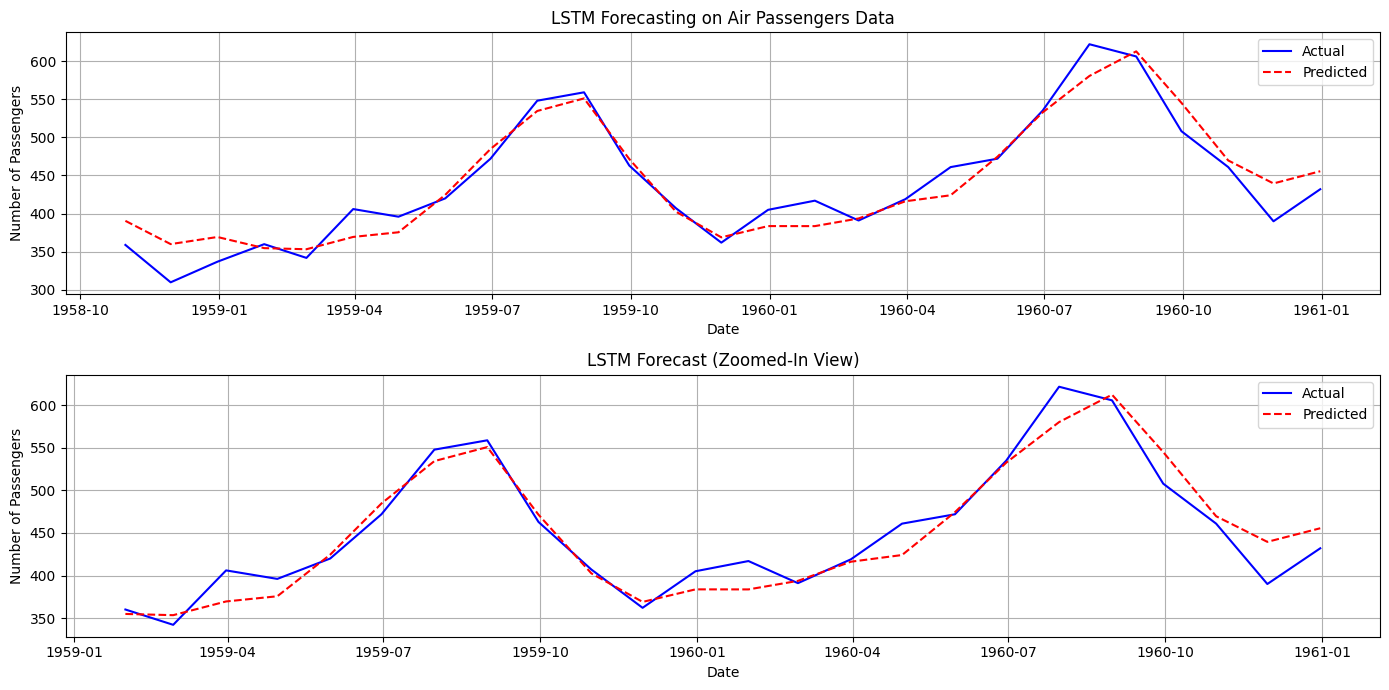

In [10]:
# Plotting
plt.figure(figsize=(14, 7))

# Plot the actual and predicted values
plt.subplot(2, 1, 1)
plt.plot(df.index[-len(y_test):], y_test, color='blue', label='Actual')
plt.plot(df.index[-len(y_pred):], y_pred, color='red', linestyle='--', label='Predicted')
plt.title('LSTM Forecasting on Air Passengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.grid(True)

# Zoomed-in view of the predictions
plt.subplot(2, 1, 2)
plt.plot(df.index[-24:], y_test[-24:], color='blue', label='Actual')
plt.plot(df.index[-24:], y_pred[-24:], color='red', linestyle='--', label='Predicted')
plt.title('LSTM Forecast (Zoomed-In View)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusion

In this implementation, we utilized Long Short-Term Memory (LSTM) networks for time series forecasting. LSTM networks are particularly effective for capturing temporal dependencies and complex patterns in sequential data, making them suitable for tasks like predicting future values in time series.

### Key Points:
- **Model Complexity**: We employed a deeper LSTM architecture with two LSTM layers to enhance the model's ability to capture intricate temporal relationships.
- **Normalization**: Data normalization was applied to ensure the model processes values in a consistent range, which is crucial for training stability.
- **Sequence Length**: A sequence length of 12 was chosen to capture yearly seasonal patterns effectively.
- **Early Stopping**: Early stopping was used to prevent overfitting and ensure the model generalizes well to unseen data.

The resulting forecasts were plotted alongside the actual values to evaluate performance. While LSTM networks can be powerful, it's essential to fine-tune hyperparameters and experiment with different architectures to achieve optimal results.

Overall, LSTM networks offer a robust framework for time series forecasting, though their performance can be significantly influenced by factors such as data quality, sequence length, and model complexity.
